## Setting up

In [1]:
#imports

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import os

In [2]:
#instantialization

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [79]:
#defining functions

def mediapipe_detection(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img) #model predicts on input frame
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    
    hand_detected: bool = results.left_hand_landmarks or results.right_hand_landmarks
    return img,results,hand_detected

def draw_landmarks(img,results):
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1))    
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1))    
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(0,0,255),thickness=1,circle_radius=1))    

# Data Extraction

Data Extraction Functions:

In [78]:
def extract_data(results):
    pose_data = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    left_hand_data = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand_data = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose_data,face_data,left_hand_data,right_hand_data])

Paths

In [109]:
DATA_PATH = os.path.join('MP_DATA')
EXTRACTION_PATH = os.path.join('VIDEO_DATA\\Extracted_data')

Glosses

In [131]:
signs = os.listdir(EXTRACTION_PATH) #list of signs
signs

['a',
 'a lot',
 'abdomen',
 'able',
 'about',
 'above',
 'accept',
 'accident',
 'accomplish',
 'accountant',
 'across',
 'action',
 'active',
 'activity',
 'actor',
 'add',
 'address',
 'adopt',
 'adult',
 'advantage',
 'affect',
 'afraid',
 'africa',
 'after',
 'afternoon',
 'again',
 'against',
 'age',
 'agenda',
 'ago',
 'agree',
 'ahead',
 'aim',
 'airplane',
 'alarm',
 'alcohol',
 'algebra',
 'all',
 'all day',
 'allergy',
 'allow',
 'almost',
 'alone',
 'alphabet',
 'already',
 'also',
 'always',
 'amazing',
 'america',
 'analyze',
 'and',
 'angel',
 'angle',
 'angry',
 'animal',
 'anniversary',
 'announce',
 'another',
 'answer',
 'any',
 'apart',
 'apartment',
 'apostrophe',
 'appear',
 'appetite',
 'apple',
 'appointment',
 'appreciate',
 'appropriate',
 'approve',
 'april',
 'archery',
 'area',
 'argue',
 'arm',
 'army',
 'around',
 'arrest',
 'arrive',
 'arrogant',
 'art',
 'article',
 'artist',
 'asia',
 'ask',
 'asl',
 'assistant',
 'attend',
 'attention',
 'attitude',
 

Testing

In [124]:
def get_path(sign:int,video:int)->str:
    '''
    pass indices of sign and video, returns path
    '''
    SIGN_PATH = os.path.join(EXTRACTION_PATH,str(signs[sign]))
    videos = os.listdir(SIGN_PATH) #list of videos in that sign
    VIDEO_PATH = os.path.join(SIGN_PATH,str(videos[video]))
    return VIDEO_PATH

In [129]:

last_frame = {'detected_at':None , 'frame':None }

#defining vedio source
VIDEO_PATH = get_path(1,0)
if os.path.exists(VIDEO_PATH):
    cap = cv2.VideoCapture(VIDEO_PATH)
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    #Testing vedio capture
    with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
        try:
            if cap.isOpened():
                while cap.isOpened():
                    ret, frame = cap.read() #read
                    if not ret:
                        break
                    frame = cv2.flip(frame, 1)
                    image, results, hand_detected = mediapipe_detection(frame,holistic) #apply model
                    draw_landmarks(image, results) #draw results
                    cv2.imshow('OpenCV Feed', image)#show
                    if hand_detected:
                        last_frame['frame'] = image.copy()
                        last_frame['detected_at'] = cap.get(cv2.CAP_PROP_POS_FRAMES)# current frame number
                    if cv2.waitKey(10) & 0xFF == ord('q'):#quit
                        raise Exception('Keyboard interrupt')
            else:
                print('Cannot open video')
        finally:
            cap.release()
            cv2.destroyAllWindows()
            
            
else:
    print('Path does not exist')

total frames = 74


50.0

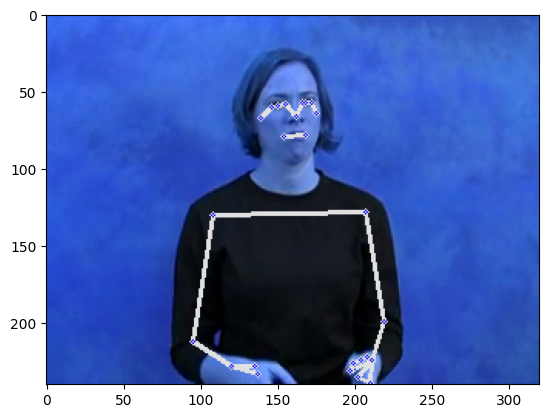

In [130]:
print(f'total frames = {total_frames}')
plt.imshow(last_frame['frame'])
last_frame['detected_at']

In [134]:
frame_nos = []
for i in range(len(signs)):
    for j in range(len(os.listdir(os.path.join(EXTRACTION_PATH,str(signs[i]))))):
        VIDEO_PATH = get_path(i,j)
        if os.path.exists(VIDEO_PATH):
            print(VIDEO_PATH)
            cap = cv2.VideoCapture(VIDEO_PATH)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            frame_nos.append(total_frames)
        else:
            print(f'not found {VIDEO_PATH}')

VIDEO_DATA\Extracted_data\a\01610.mp4
VIDEO_DATA\Extracted_data\a\01611.mp4
VIDEO_DATA\Extracted_data\a\01612.mp4
VIDEO_DATA\Extracted_data\a\01615.mp4
VIDEO_DATA\Extracted_data\a lot\02124.mp4
VIDEO_DATA\Extracted_data\a lot\02125.mp4
VIDEO_DATA\Extracted_data\a lot\02126.mp4
VIDEO_DATA\Extracted_data\a lot\02128.mp4
VIDEO_DATA\Extracted_data\a lot\02129.mp4
VIDEO_DATA\Extracted_data\a lot\02130.mp4
VIDEO_DATA\Extracted_data\a lot\02131.mp4
VIDEO_DATA\Extracted_data\abdomen\00335.mp4
VIDEO_DATA\Extracted_data\abdomen\00336.mp4
VIDEO_DATA\Extracted_data\abdomen\00338.mp4
VIDEO_DATA\Extracted_data\abdomen\00339.mp4
VIDEO_DATA\Extracted_data\abdomen\00341.mp4
VIDEO_DATA\Extracted_data\able\00376.mp4
VIDEO_DATA\Extracted_data\able\00377.mp4
VIDEO_DATA\Extracted_data\able\00378.mp4
VIDEO_DATA\Extracted_data\able\00381.mp4
VIDEO_DATA\Extracted_data\able\00382.mp4
VIDEO_DATA\Extracted_data\able\00384.mp4
VIDEO_DATA\Extracted_data\about\00414.mp4
VIDEO_DATA\Extracted_data\about\00415.mp4
VIDE

VIDEO_DATA\Extracted_data\ahead\01605.mp4
VIDEO_DATA\Extracted_data\aim\01642.mp4
VIDEO_DATA\Extracted_data\aim\01643.mp4
VIDEO_DATA\Extracted_data\aim\01646.mp4
VIDEO_DATA\Extracted_data\aim\01652.mp4
VIDEO_DATA\Extracted_data\aim\01653.mp4
VIDEO_DATA\Extracted_data\airplane\01724.mp4
VIDEO_DATA\Extracted_data\airplane\01726.mp4
VIDEO_DATA\Extracted_data\airplane\01727.mp4
VIDEO_DATA\Extracted_data\airplane\01729.mp4
VIDEO_DATA\Extracted_data\airplane\01730.mp4
VIDEO_DATA\Extracted_data\airplane\01734.mp4
VIDEO_DATA\Extracted_data\airplane\65038.mp4
VIDEO_DATA\Extracted_data\alarm\01801.mp4
VIDEO_DATA\Extracted_data\alarm\01802.mp4
VIDEO_DATA\Extracted_data\alarm\01804.mp4
VIDEO_DATA\Extracted_data\alarm\01808.mp4
VIDEO_DATA\Extracted_data\alarm\65040.mp4
VIDEO_DATA\Extracted_data\alcohol\01831.mp4
VIDEO_DATA\Extracted_data\alcohol\01832.mp4
VIDEO_DATA\Extracted_data\alcohol\01836.mp4
VIDEO_DATA\Extracted_data\alcohol\01839.mp4
VIDEO_DATA\Extracted_data\algebra\01874.mp4
VIDEO_DATA\Ex

VIDEO_DATA\Extracted_data\appetite\02971.mp4
VIDEO_DATA\Extracted_data\appetite\02973.mp4
VIDEO_DATA\Extracted_data\appetite\02975.mp4
VIDEO_DATA\Extracted_data\apple\02999.mp4
VIDEO_DATA\Extracted_data\apple\03000.mp4
VIDEO_DATA\Extracted_data\apple\03001.mp4
VIDEO_DATA\Extracted_data\apple\03002.mp4
VIDEO_DATA\Extracted_data\apple\03003.mp4
VIDEO_DATA\Extracted_data\apple\03005.mp4
VIDEO_DATA\Extracted_data\apple\03008.mp4
VIDEO_DATA\Extracted_data\apple\65084.mp4
VIDEO_DATA\Extracted_data\apple\65085.mp4
VIDEO_DATA\Extracted_data\apple\65086.mp4
VIDEO_DATA\Extracted_data\apple\69213.mp4
VIDEO_DATA\Extracted_data\appointment\03055.mp4
VIDEO_DATA\Extracted_data\appointment\03056.mp4
VIDEO_DATA\Extracted_data\appointment\03057.mp4
VIDEO_DATA\Extracted_data\appointment\03058.mp4
VIDEO_DATA\Extracted_data\appointment\03059.mp4
VIDEO_DATA\Extracted_data\appointment\03060.mp4
VIDEO_DATA\Extracted_data\appointment\03061.mp4
VIDEO_DATA\Extracted_data\appointment\03062.mp4
VIDEO_DATA\Extracte

VIDEO_DATA\Extracted_data\australia\04193.mp4
VIDEO_DATA\Extracted_data\australia\04198.mp4
VIDEO_DATA\Extracted_data\australia\65111.mp4
VIDEO_DATA\Extracted_data\authority\04226.mp4
VIDEO_DATA\Extracted_data\authority\04227.mp4
VIDEO_DATA\Extracted_data\authority\04228.mp4
VIDEO_DATA\Extracted_data\authority\04230.mp4
VIDEO_DATA\Extracted_data\authority\04232.mp4
VIDEO_DATA\Extracted_data\autumn\04289.mp4
VIDEO_DATA\Extracted_data\autumn\04290.mp4
VIDEO_DATA\Extracted_data\autumn\04291.mp4
VIDEO_DATA\Extracted_data\autumn\04292.mp4
VIDEO_DATA\Extracted_data\autumn\04294.mp4
VIDEO_DATA\Extracted_data\autumn\04296.mp4
VIDEO_DATA\Extracted_data\autumn\65113.mp4
VIDEO_DATA\Extracted_data\average\04324.mp4
VIDEO_DATA\Extracted_data\average\04325.mp4
VIDEO_DATA\Extracted_data\average\04326.mp4
VIDEO_DATA\Extracted_data\average\04330.mp4
VIDEO_DATA\Extracted_data\average\04332.mp4
VIDEO_DATA\Extracted_data\avoid\04343.mp4
VIDEO_DATA\Extracted_data\avoid\04344.mp4
VIDEO_DATA\Extracted_data\a

VIDEO_DATA\Extracted_data\basketball\05232.mp4
VIDEO_DATA\Extracted_data\basketball\05233.mp4
VIDEO_DATA\Extracted_data\basketball\05234.mp4
VIDEO_DATA\Extracted_data\basketball\05238.mp4
VIDEO_DATA\Extracted_data\basketball\05239.mp4
VIDEO_DATA\Extracted_data\basketball\05243.mp4
VIDEO_DATA\Extracted_data\basketball\65145.mp4
VIDEO_DATA\Extracted_data\basketball\69225.mp4
VIDEO_DATA\Extracted_data\bath\05275.mp4
VIDEO_DATA\Extracted_data\bath\05276.mp4
VIDEO_DATA\Extracted_data\bath\05277.mp4
VIDEO_DATA\Extracted_data\bath\05278.mp4
VIDEO_DATA\Extracted_data\bath\05280.mp4
VIDEO_DATA\Extracted_data\bath\05285.mp4
VIDEO_DATA\Extracted_data\bath\65147.mp4
VIDEO_DATA\Extracted_data\bathroom\05297.mp4
VIDEO_DATA\Extracted_data\bathroom\05298.mp4
VIDEO_DATA\Extracted_data\bathroom\05299.mp4
VIDEO_DATA\Extracted_data\bathroom\05300.mp4
VIDEO_DATA\Extracted_data\bathroom\05303.mp4
VIDEO_DATA\Extracted_data\bathroom\05310.mp4
VIDEO_DATA\Extracted_data\bathroom\65148.mp4
VIDEO_DATA\Extracted_d

VIDEO_DATA\Extracted_data\bike\06215.mp4
VIDEO_DATA\Extracted_data\bike\06216.mp4
VIDEO_DATA\Extracted_data\bike\06218.mp4
VIDEO_DATA\Extracted_data\biology\06313.mp4
VIDEO_DATA\Extracted_data\biology\06314.mp4
VIDEO_DATA\Extracted_data\biology\06315.mp4
VIDEO_DATA\Extracted_data\biology\06317.mp4
VIDEO_DATA\Extracted_data\biology\06319.mp4
VIDEO_DATA\Extracted_data\bird\06330.mp4
VIDEO_DATA\Extracted_data\bird\06331.mp4
VIDEO_DATA\Extracted_data\bird\06332.mp4
VIDEO_DATA\Extracted_data\bird\06333.mp4
VIDEO_DATA\Extracted_data\bird\06334.mp4
VIDEO_DATA\Extracted_data\bird\06335.mp4
VIDEO_DATA\Extracted_data\bird\06337.mp4
VIDEO_DATA\Extracted_data\bird\06343.mp4
VIDEO_DATA\Extracted_data\bird\65187.mp4
VIDEO_DATA\Extracted_data\bird\69233.mp4
VIDEO_DATA\Extracted_data\birth\06372.mp4
VIDEO_DATA\Extracted_data\birth\06373.mp4
VIDEO_DATA\Extracted_data\birth\06375.mp4
VIDEO_DATA\Extracted_data\birth\06379.mp4
VIDEO_DATA\Extracted_data\birth\65189.mp4
VIDEO_DATA\Extracted_data\birth\65190

VIDEO_DATA\Extracted_data\boyfriend\07441.mp4
VIDEO_DATA\Extracted_data\boyfriend\07443.mp4
VIDEO_DATA\Extracted_data\boyfriend\07445.mp4
VIDEO_DATA\Extracted_data\boyfriend\07451.mp4
VIDEO_DATA\Extracted_data\bra\07499.mp4
VIDEO_DATA\Extracted_data\bra\07500.mp4
VIDEO_DATA\Extracted_data\bra\07502.mp4
VIDEO_DATA\Extracted_data\bracelet\07470.mp4
VIDEO_DATA\Extracted_data\bracelet\07471.mp4
VIDEO_DATA\Extracted_data\bracelet\07472.mp4
VIDEO_DATA\Extracted_data\bracelet\07473.mp4
VIDEO_DATA\Extracted_data\bracelet\07475.mp4
VIDEO_DATA\Extracted_data\bracelet\07479.mp4
VIDEO_DATA\Extracted_data\bracelet\65247.mp4
VIDEO_DATA\Extracted_data\brag\07492.mp4
VIDEO_DATA\Extracted_data\brag\07493.mp4
VIDEO_DATA\Extracted_data\brag\07495.mp4
VIDEO_DATA\Extracted_data\brag\07498.mp4
VIDEO_DATA\Extracted_data\brave\07575.mp4
VIDEO_DATA\Extracted_data\brave\07576.mp4
VIDEO_DATA\Extracted_data\brave\07578.mp4
VIDEO_DATA\Extracted_data\brave\07580.mp4
VIDEO_DATA\Extracted_data\brave\65251.mp4
VIDEO_D

VIDEO_DATA\Extracted_data\calculus\08644.mp4
VIDEO_DATA\Extracted_data\calculus\08645.mp4
VIDEO_DATA\Extracted_data\calculus\08647.mp4
VIDEO_DATA\Extracted_data\calculus\08649.mp4
VIDEO_DATA\Extracted_data\california\08670.mp4
VIDEO_DATA\Extracted_data\california\08671.mp4
VIDEO_DATA\Extracted_data\california\08672.mp4
VIDEO_DATA\Extracted_data\california\08673.mp4
VIDEO_DATA\Extracted_data\california\08674.mp4
VIDEO_DATA\Extracted_data\california\08676.mp4
VIDEO_DATA\Extracted_data\california\08677.mp4
VIDEO_DATA\Extracted_data\california\08680.mp4
VIDEO_DATA\Extracted_data\california\65289.mp4
VIDEO_DATA\Extracted_data\call\08689.mp4
VIDEO_DATA\Extracted_data\call\08690.mp4
VIDEO_DATA\Extracted_data\call\08691.mp4
VIDEO_DATA\Extracted_data\call\08692.mp4
VIDEO_DATA\Extracted_data\call\08694.mp4
VIDEO_DATA\Extracted_data\call\08701.mp4
VIDEO_DATA\Extracted_data\call\08702.mp4
VIDEO_DATA\Extracted_data\call\08706.mp4
VIDEO_DATA\Extracted_data\call\08707.mp4
VIDEO_DATA\Extracted_data\ca

VIDEO_DATA\Extracted_data\cemetery\09717.mp4
VIDEO_DATA\Extracted_data\cent\09735.mp4
VIDEO_DATA\Extracted_data\cent\09736.mp4
VIDEO_DATA\Extracted_data\cent\09737.mp4
VIDEO_DATA\Extracted_data\cent\09740.mp4
VIDEO_DATA\Extracted_data\cent\09742.mp4
VIDEO_DATA\Extracted_data\cent\65323.mp4
VIDEO_DATA\Extracted_data\center\09721.mp4
VIDEO_DATA\Extracted_data\center\09722.mp4
VIDEO_DATA\Extracted_data\center\09723.mp4
VIDEO_DATA\Extracted_data\center\09725.mp4
VIDEO_DATA\Extracted_data\center\09726.mp4
VIDEO_DATA\Extracted_data\center\09732.mp4
VIDEO_DATA\Extracted_data\cereal\09774.mp4
VIDEO_DATA\Extracted_data\cereal\09775.mp4
VIDEO_DATA\Extracted_data\cereal\09776.mp4
VIDEO_DATA\Extracted_data\cereal\09777.mp4
VIDEO_DATA\Extracted_data\cereal\09781.mp4
VIDEO_DATA\Extracted_data\cereal\09786.mp4
VIDEO_DATA\Extracted_data\cereal\69264.mp4
VIDEO_DATA\Extracted_data\certificate\09806.mp4
VIDEO_DATA\Extracted_data\certificate\09807.mp4
VIDEO_DATA\Extracted_data\certificate\09808.mp4
VIDEO_

VIDEO_DATA\Extracted_data\chop\10648.mp4
VIDEO_DATA\Extracted_data\chop\10652.mp4
VIDEO_DATA\Extracted_data\chop\10656.mp4
VIDEO_DATA\Extracted_data\chop\65355.mp4
VIDEO_DATA\Extracted_data\christian\10686.mp4
VIDEO_DATA\Extracted_data\christian\10687.mp4
VIDEO_DATA\Extracted_data\christian\10688.mp4
VIDEO_DATA\Extracted_data\christian\10689.mp4
VIDEO_DATA\Extracted_data\christian\10692.mp4
VIDEO_DATA\Extracted_data\christian\10693.mp4
VIDEO_DATA\Extracted_data\christian\65356.mp4
VIDEO_DATA\Extracted_data\christmas\10703.mp4
VIDEO_DATA\Extracted_data\christmas\10704.mp4
VIDEO_DATA\Extracted_data\christmas\10705.mp4
VIDEO_DATA\Extracted_data\christmas\10708.mp4
VIDEO_DATA\Extracted_data\christmas\10709.mp4
VIDEO_DATA\Extracted_data\christmas\10711.mp4
VIDEO_DATA\Extracted_data\christmas\10715.mp4
VIDEO_DATA\Extracted_data\christmas\65357.mp4
VIDEO_DATA\Extracted_data\church\10769.mp4
VIDEO_DATA\Extracted_data\church\10770.mp4
VIDEO_DATA\Extracted_data\church\10771.mp4
VIDEO_DATA\Extrac

VIDEO_DATA\Extracted_data\command\11942.mp4
VIDEO_DATA\Extracted_data\command\11943.mp4
VIDEO_DATA\Extracted_data\command\11944.mp4
VIDEO_DATA\Extracted_data\command\11948.mp4
VIDEO_DATA\Extracted_data\command\11952.mp4
VIDEO_DATA\Extracted_data\common\12013.mp4
VIDEO_DATA\Extracted_data\common\12014.mp4
VIDEO_DATA\Extracted_data\common\12016.mp4
VIDEO_DATA\Extracted_data\common\12020.mp4
VIDEO_DATA\Extracted_data\common\69276.mp4
VIDEO_DATA\Extracted_data\community\12060.mp4
VIDEO_DATA\Extracted_data\community\12062.mp4
VIDEO_DATA\Extracted_data\community\12063.mp4
VIDEO_DATA\Extracted_data\community\12064.mp4
VIDEO_DATA\Extracted_data\community\12066.mp4
VIDEO_DATA\Extracted_data\community\12069.mp4
VIDEO_DATA\Extracted_data\commute\12072.mp4
VIDEO_DATA\Extracted_data\commute\12073.mp4
VIDEO_DATA\Extracted_data\commute\12074.mp4
VIDEO_DATA\Extracted_data\commute\12076.mp4
VIDEO_DATA\Extracted_data\commute\12079.mp4
VIDEO_DATA\Extracted_data\company\12100.mp4
VIDEO_DATA\Extracted_data

VIDEO_DATA\Extracted_data\cop\13244.mp4
VIDEO_DATA\Extracted_data\cop\13245.mp4
VIDEO_DATA\Extracted_data\cop\13246.mp4
VIDEO_DATA\Extracted_data\cop\13247.mp4
VIDEO_DATA\Extracted_data\cop\13249.mp4
VIDEO_DATA\Extracted_data\cop\13250.mp4
VIDEO_DATA\Extracted_data\cop\13251.mp4
VIDEO_DATA\Extracted_data\cop\13253.mp4
VIDEO_DATA\Extracted_data\copy\13267.mp4
VIDEO_DATA\Extracted_data\copy\13268.mp4
VIDEO_DATA\Extracted_data\copy\13269.mp4
VIDEO_DATA\Extracted_data\copy\13273.mp4
VIDEO_DATA\Extracted_data\copy\13275.mp4
VIDEO_DATA\Extracted_data\copy\13278.mp4
VIDEO_DATA\Extracted_data\copy\13279.mp4
VIDEO_DATA\Extracted_data\copy\65405.mp4
VIDEO_DATA\Extracted_data\corn\13323.mp4
VIDEO_DATA\Extracted_data\corn\13325.mp4
VIDEO_DATA\Extracted_data\corn\13326.mp4
VIDEO_DATA\Extracted_data\corn\13327.mp4
VIDEO_DATA\Extracted_data\corn\13328.mp4
VIDEO_DATA\Extracted_data\corn\13329.mp4
VIDEO_DATA\Extracted_data\corn\13333.mp4
VIDEO_DATA\Extracted_data\corn\13334.mp4
VIDEO_DATA\Extracted_dat

VIDEO_DATA\Extracted_data\dad\69289.mp4
VIDEO_DATA\Extracted_data\daily\14577.mp4
VIDEO_DATA\Extracted_data\daily\14578.mp4
VIDEO_DATA\Extracted_data\daily\14580.mp4
VIDEO_DATA\Extracted_data\daily\14584.mp4
VIDEO_DATA\Extracted_data\dance\14622.mp4
VIDEO_DATA\Extracted_data\dance\14623.mp4
VIDEO_DATA\Extracted_data\dance\14624.mp4
VIDEO_DATA\Extracted_data\dance\14625.mp4
VIDEO_DATA\Extracted_data\dance\14627.mp4
VIDEO_DATA\Extracted_data\dance\14633.mp4
VIDEO_DATA\Extracted_data\dance\65434.mp4
VIDEO_DATA\Extracted_data\dark\14671.mp4
VIDEO_DATA\Extracted_data\dark\14672.mp4
VIDEO_DATA\Extracted_data\dark\14673.mp4
VIDEO_DATA\Extracted_data\dark\14674.mp4
VIDEO_DATA\Extracted_data\dark\14675.mp4
VIDEO_DATA\Extracted_data\dark\14676.mp4
VIDEO_DATA\Extracted_data\dark\14680.mp4
VIDEO_DATA\Extracted_data\dark\14681.mp4
VIDEO_DATA\Extracted_data\dark\14685.mp4
VIDEO_DATA\Extracted_data\dark\65439.mp4
VIDEO_DATA\Extracted_data\dark\65440.mp4
VIDEO_DATA\Extracted_data\dark\69290.mp4
VIDEO_

VIDEO_DATA\Extracted_data\depressed\15648.mp4
VIDEO_DATA\Extracted_data\depressed\15649.mp4
VIDEO_DATA\Extracted_data\depressed\15650.mp4
VIDEO_DATA\Extracted_data\depressed\15652.mp4
VIDEO_DATA\Extracted_data\describe\15706.mp4
VIDEO_DATA\Extracted_data\describe\15707.mp4
VIDEO_DATA\Extracted_data\describe\15708.mp4
VIDEO_DATA\Extracted_data\describe\15709.mp4
VIDEO_DATA\Extracted_data\describe\15711.mp4
VIDEO_DATA\Extracted_data\describe\15713.mp4
VIDEO_DATA\Extracted_data\describe\69294.mp4
VIDEO_DATA\Extracted_data\desert\15721.mp4
VIDEO_DATA\Extracted_data\desert\15723.mp4
VIDEO_DATA\Extracted_data\desert\15724.mp4
VIDEO_DATA\Extracted_data\desert\15725.mp4
VIDEO_DATA\Extracted_data\desert\15728.mp4
VIDEO_DATA\Extracted_data\desert\15732.mp4
VIDEO_DATA\Extracted_data\desk\15772.mp4
VIDEO_DATA\Extracted_data\desk\15773.mp4
VIDEO_DATA\Extracted_data\desk\15774.mp4
VIDEO_DATA\Extracted_data\desk\15775.mp4
VIDEO_DATA\Extracted_data\desk\15776.mp4
VIDEO_DATA\Extracted_data\desk\15781.m

VIDEO_DATA\Extracted_data\dive\16892.mp4
VIDEO_DATA\Extracted_data\dive\16893.mp4
VIDEO_DATA\Extracted_data\dive\16894.mp4
VIDEO_DATA\Extracted_data\dive\16895.mp4
VIDEO_DATA\Extracted_data\dive\16897.mp4
VIDEO_DATA\Extracted_data\dive\16899.mp4
VIDEO_DATA\Extracted_data\dive\65495.mp4
VIDEO_DATA\Extracted_data\divide\16925.mp4
VIDEO_DATA\Extracted_data\divide\16926.mp4
VIDEO_DATA\Extracted_data\divide\16927.mp4
VIDEO_DATA\Extracted_data\divide\16930.mp4
VIDEO_DATA\Extracted_data\divide\16936.mp4
VIDEO_DATA\Extracted_data\divorce\16963.mp4
VIDEO_DATA\Extracted_data\divorce\16965.mp4
VIDEO_DATA\Extracted_data\divorce\16966.mp4
VIDEO_DATA\Extracted_data\divorce\16968.mp4
VIDEO_DATA\Extracted_data\divorce\16972.mp4
VIDEO_DATA\Extracted_data\divorce\16976.mp4
VIDEO_DATA\Extracted_data\dizzy\16982.mp4
VIDEO_DATA\Extracted_data\dizzy\16984.mp4
VIDEO_DATA\Extracted_data\dizzy\16985.mp4
VIDEO_DATA\Extracted_data\dizzy\16986.mp4
VIDEO_DATA\Extracted_data\dizzy\65501.mp4
VIDEO_DATA\Extracted_dat

VIDEO_DATA\Extracted_data\each\18113.mp4
VIDEO_DATA\Extracted_data\each\18118.mp4
VIDEO_DATA\Extracted_data\eagle\18138.mp4
VIDEO_DATA\Extracted_data\eagle\18139.mp4
VIDEO_DATA\Extracted_data\eagle\18140.mp4
VIDEO_DATA\Extracted_data\eagle\18142.mp4
VIDEO_DATA\Extracted_data\eagle\18144.mp4
VIDEO_DATA\Extracted_data\eagle\65588.mp4
VIDEO_DATA\Extracted_data\eagle\65589.mp4
VIDEO_DATA\Extracted_data\ear\18154.mp4
VIDEO_DATA\Extracted_data\ear\18155.mp4
VIDEO_DATA\Extracted_data\ear\18156.mp4
VIDEO_DATA\Extracted_data\ear\18158.mp4
VIDEO_DATA\Extracted_data\ear\18161.mp4
VIDEO_DATA\Extracted_data\ear\65590.mp4
VIDEO_DATA\Extracted_data\ear\65591.mp4
VIDEO_DATA\Extracted_data\ear\69306.mp4
VIDEO_DATA\Extracted_data\early\18166.mp4
VIDEO_DATA\Extracted_data\early\18167.mp4
VIDEO_DATA\Extracted_data\early\18168.mp4
VIDEO_DATA\Extracted_data\early\18169.mp4
VIDEO_DATA\Extracted_data\early\18178.mp4
VIDEO_DATA\Extracted_data\early\18184.mp4
VIDEO_DATA\Extracted_data\earn\18195.mp4
VIDEO_DATA\

VIDEO_DATA\Extracted_data\england\19229.mp4
VIDEO_DATA\Extracted_data\english\19232.mp4
VIDEO_DATA\Extracted_data\english\19233.mp4
VIDEO_DATA\Extracted_data\english\19236.mp4
VIDEO_DATA\Extracted_data\english\19239.mp4
VIDEO_DATA\Extracted_data\english\65634.mp4
VIDEO_DATA\Extracted_data\enjoy\19257.mp4
VIDEO_DATA\Extracted_data\enjoy\19258.mp4
VIDEO_DATA\Extracted_data\enjoy\19259.mp4
VIDEO_DATA\Extracted_data\enjoy\19260.mp4
VIDEO_DATA\Extracted_data\enjoy\19261.mp4
VIDEO_DATA\Extracted_data\enjoy\19264.mp4
VIDEO_DATA\Extracted_data\enjoy\19269.mp4
VIDEO_DATA\Extracted_data\enough\19305.mp4
VIDEO_DATA\Extracted_data\enough\19306.mp4
VIDEO_DATA\Extracted_data\enough\19309.mp4
VIDEO_DATA\Extracted_data\enough\19312.mp4
VIDEO_DATA\Extracted_data\enter\19326.mp4
VIDEO_DATA\Extracted_data\enter\19327.mp4
VIDEO_DATA\Extracted_data\enter\19328.mp4
VIDEO_DATA\Extracted_data\enter\19330.mp4
VIDEO_DATA\Extracted_data\enter\19335.mp4
VIDEO_DATA\Extracted_data\envelope\19393.mp4
VIDEO_DATA\Extr

VIDEO_DATA\Extracted_data\eyes\20662.mp4
VIDEO_DATA\Extracted_data\eyes\20665.mp4
VIDEO_DATA\Extracted_data\eyes\20667.mp4
VIDEO_DATA\Extracted_data\eyes\65667.mp4
VIDEO_DATA\Extracted_data\face\20699.mp4
VIDEO_DATA\Extracted_data\face\20700.mp4
VIDEO_DATA\Extracted_data\face\20701.mp4
VIDEO_DATA\Extracted_data\face\20702.mp4
VIDEO_DATA\Extracted_data\face\20706.mp4
VIDEO_DATA\Extracted_data\face\20711.mp4
VIDEO_DATA\Extracted_data\face\65668.mp4
VIDEO_DATA\Extracted_data\face\65669.mp4
VIDEO_DATA\Extracted_data\fact\20737.mp4
VIDEO_DATA\Extracted_data\fact\20739.mp4
VIDEO_DATA\Extracted_data\fact\20740.mp4
VIDEO_DATA\Extracted_data\fact\20741.mp4
VIDEO_DATA\Extracted_data\fact\20746.mp4
VIDEO_DATA\Extracted_data\fact\69315.mp4
VIDEO_DATA\Extracted_data\faculty\20766.mp4
VIDEO_DATA\Extracted_data\faculty\20767.mp4
VIDEO_DATA\Extracted_data\faculty\20768.mp4
VIDEO_DATA\Extracted_data\faculty\20770.mp4
VIDEO_DATA\Extracted_data\faculty\65671.mp4
VIDEO_DATA\Extracted_data\fail\20793.mp4
V

VIDEO_DATA\Extracted_data\finish\21943.mp4
VIDEO_DATA\Extracted_data\finish\21944.mp4
VIDEO_DATA\Extracted_data\finish\21945.mp4
VIDEO_DATA\Extracted_data\finish\21949.mp4
VIDEO_DATA\Extracted_data\finish\21950.mp4
VIDEO_DATA\Extracted_data\finish\21951.mp4
VIDEO_DATA\Extracted_data\first\22085.mp4
VIDEO_DATA\Extracted_data\first\22086.mp4
VIDEO_DATA\Extracted_data\first\22087.mp4
VIDEO_DATA\Extracted_data\first\22094.mp4
VIDEO_DATA\Extracted_data\first\22095.mp4
VIDEO_DATA\Extracted_data\first\22098.mp4
VIDEO_DATA\Extracted_data\first\65728.mp4
VIDEO_DATA\Extracted_data\first\65729.mp4
VIDEO_DATA\Extracted_data\first\65730.mp4
VIDEO_DATA\Extracted_data\fish\22113.mp4
VIDEO_DATA\Extracted_data\fish\22114.mp4
VIDEO_DATA\Extracted_data\fish\22115.mp4
VIDEO_DATA\Extracted_data\fish\22116.mp4
VIDEO_DATA\Extracted_data\fish\22117.mp4
VIDEO_DATA\Extracted_data\fish\22120.mp4
VIDEO_DATA\Extracted_data\fish\22121.mp4
VIDEO_DATA\Extracted_data\fish\22130.mp4
VIDEO_DATA\Extracted_data\fish\65731

VIDEO_DATA\Extracted_data\french fries\65780.mp4
VIDEO_DATA\Extracted_data\friday\23542.mp4
VIDEO_DATA\Extracted_data\friday\23543.mp4
VIDEO_DATA\Extracted_data\friday\23544.mp4
VIDEO_DATA\Extracted_data\friday\23545.mp4
VIDEO_DATA\Extracted_data\friday\23548.mp4
VIDEO_DATA\Extracted_data\friday\65781.mp4
VIDEO_DATA\Extracted_data\friend\23568.mp4
VIDEO_DATA\Extracted_data\friend\23569.mp4
VIDEO_DATA\Extracted_data\friend\23570.mp4
VIDEO_DATA\Extracted_data\friend\23572.mp4
VIDEO_DATA\Extracted_data\friend\23574.mp4
VIDEO_DATA\Extracted_data\friend\23578.mp4
VIDEO_DATA\Extracted_data\friendly\23580.mp4
VIDEO_DATA\Extracted_data\friendly\23581.mp4
VIDEO_DATA\Extracted_data\friendly\23582.mp4
VIDEO_DATA\Extracted_data\friendly\23583.mp4
VIDEO_DATA\Extracted_data\friendly\23585.mp4
VIDEO_DATA\Extracted_data\friendly\23589.mp4
VIDEO_DATA\Extracted_data\friendly\65783.mp4
VIDEO_DATA\Extracted_data\frog\23627.mp4
VIDEO_DATA\Extracted_data\frog\23628.mp4
VIDEO_DATA\Extracted_data\frog\23629.m

VIDEO_DATA\Extracted_data\give\24660.mp4
VIDEO_DATA\Extracted_data\give\69343.mp4
VIDEO_DATA\Extracted_data\give up\24680.mp4
VIDEO_DATA\Extracted_data\give up\24681.mp4
VIDEO_DATA\Extracted_data\give up\24682.mp4
VIDEO_DATA\Extracted_data\give up\24685.mp4
VIDEO_DATA\Extracted_data\give up\24687.mp4
VIDEO_DATA\Extracted_data\give up\65820.mp4
VIDEO_DATA\Extracted_data\glass\24734.mp4
VIDEO_DATA\Extracted_data\glass\24735.mp4
VIDEO_DATA\Extracted_data\glass\24736.mp4
VIDEO_DATA\Extracted_data\glass\24741.mp4
VIDEO_DATA\Extracted_data\glass\24746.mp4
VIDEO_DATA\Extracted_data\glass\69344.mp4
VIDEO_DATA\Extracted_data\glasses\24720.mp4
VIDEO_DATA\Extracted_data\glasses\24721.mp4
VIDEO_DATA\Extracted_data\glasses\24722.mp4
VIDEO_DATA\Extracted_data\glasses\24724.mp4
VIDEO_DATA\Extracted_data\glasses\24725.mp4
VIDEO_DATA\Extracted_data\glasses\24726.mp4
VIDEO_DATA\Extracted_data\glasses\24728.mp4
VIDEO_DATA\Extracted_data\glasses\24732.mp4
VIDEO_DATA\Extracted_data\glasses\65822.mp4
VIDEO_

VIDEO_DATA\Extracted_data\grow up\65863.mp4
VIDEO_DATA\Extracted_data\guess\25917.mp4
VIDEO_DATA\Extracted_data\guess\25918.mp4
VIDEO_DATA\Extracted_data\guess\25920.mp4
VIDEO_DATA\Extracted_data\guess\25922.mp4
VIDEO_DATA\Extracted_data\guess\25926.mp4
VIDEO_DATA\Extracted_data\guess\65864.mp4
VIDEO_DATA\Extracted_data\guide\25941.mp4
VIDEO_DATA\Extracted_data\guide\25942.mp4
VIDEO_DATA\Extracted_data\guide\25945.mp4
VIDEO_DATA\Extracted_data\guide\25946.mp4
VIDEO_DATA\Extracted_data\guide\25948.mp4
VIDEO_DATA\Extracted_data\guilty\25960.mp4
VIDEO_DATA\Extracted_data\guilty\25961.mp4
VIDEO_DATA\Extracted_data\guilty\25962.mp4
VIDEO_DATA\Extracted_data\guilty\25966.mp4
VIDEO_DATA\Extracted_data\guilty\25967.mp4
VIDEO_DATA\Extracted_data\guitar\25976.mp4
VIDEO_DATA\Extracted_data\guitar\25977.mp4
VIDEO_DATA\Extracted_data\guitar\25978.mp4
VIDEO_DATA\Extracted_data\guitar\25979.mp4
VIDEO_DATA\Extracted_data\guitar\25982.mp4
VIDEO_DATA\Extracted_data\guitar\25984.mp4
VIDEO_DATA\Extracted_

VIDEO_DATA\Extracted_data\helmet\27190.mp4
VIDEO_DATA\Extracted_data\helmet\27192.mp4
VIDEO_DATA\Extracted_data\help\27206.mp4
VIDEO_DATA\Extracted_data\help\27207.mp4
VIDEO_DATA\Extracted_data\help\27208.mp4
VIDEO_DATA\Extracted_data\help\27209.mp4
VIDEO_DATA\Extracted_data\help\27213.mp4
VIDEO_DATA\Extracted_data\help\27214.mp4
VIDEO_DATA\Extracted_data\help\27215.mp4
VIDEO_DATA\Extracted_data\help\27216.mp4
VIDEO_DATA\Extracted_data\help\27217.mp4
VIDEO_DATA\Extracted_data\help\27221.mp4
VIDEO_DATA\Extracted_data\help\65889.mp4
VIDEO_DATA\Extracted_data\help\65890.mp4
VIDEO_DATA\Extracted_data\help\65891.mp4
VIDEO_DATA\Extracted_data\help\69364.mp4
VIDEO_DATA\Extracted_data\her\27274.mp4
VIDEO_DATA\Extracted_data\her\27275.mp4
VIDEO_DATA\Extracted_data\her\27279.mp4
VIDEO_DATA\Extracted_data\her\27280.mp4
VIDEO_DATA\Extracted_data\her\27281.mp4
VIDEO_DATA\Extracted_data\her\27282.mp4
VIDEO_DATA\Extracted_data\her\27284.mp4
VIDEO_DATA\Extracted_data\her\27285.mp4
VIDEO_DATA\Extracted

VIDEO_DATA\Extracted_data\hurry\28430.mp4
VIDEO_DATA\Extracted_data\hurry\28436.mp4
VIDEO_DATA\Extracted_data\hurt\28440.mp4
VIDEO_DATA\Extracted_data\hurt\28441.mp4
VIDEO_DATA\Extracted_data\hurt\28445.mp4
VIDEO_DATA\Extracted_data\hurt\28446.mp4
VIDEO_DATA\Extracted_data\hurt\28454.mp4
VIDEO_DATA\Extracted_data\husband\28463.mp4
VIDEO_DATA\Extracted_data\husband\28464.mp4
VIDEO_DATA\Extracted_data\husband\28465.mp4
VIDEO_DATA\Extracted_data\husband\28466.mp4
VIDEO_DATA\Extracted_data\husband\28469.mp4
VIDEO_DATA\Extracted_data\husband\28473.mp4
VIDEO_DATA\Extracted_data\husband\65913.mp4
VIDEO_DATA\Extracted_data\ice cream\28582.mp4
VIDEO_DATA\Extracted_data\ice cream\28583.mp4
VIDEO_DATA\Extracted_data\ice cream\28584.mp4
VIDEO_DATA\Extracted_data\ice cream\28585.mp4
VIDEO_DATA\Extracted_data\ice cream\28586.mp4
VIDEO_DATA\Extracted_data\ice cream\28588.mp4
VIDEO_DATA\Extracted_data\ice cream\28590.mp4
VIDEO_DATA\Extracted_data\idea\28648.mp4
VIDEO_DATA\Extracted_data\idea\28649.mp4

VIDEO_DATA\Extracted_data\introduce\30392.mp4
VIDEO_DATA\Extracted_data\introduce\65958.mp4
VIDEO_DATA\Extracted_data\invest\30451.mp4
VIDEO_DATA\Extracted_data\invest\30452.mp4
VIDEO_DATA\Extracted_data\invest\30453.mp4
VIDEO_DATA\Extracted_data\invest\30454.mp4
VIDEO_DATA\Extracted_data\invest\30455.mp4
VIDEO_DATA\Extracted_data\invest\30460.mp4
VIDEO_DATA\Extracted_data\invest\65959.mp4
VIDEO_DATA\Extracted_data\investigate\30468.mp4
VIDEO_DATA\Extracted_data\investigate\30469.mp4
VIDEO_DATA\Extracted_data\investigate\30470.mp4
VIDEO_DATA\Extracted_data\investigate\30471.mp4
VIDEO_DATA\Extracted_data\investigate\30472.mp4
VIDEO_DATA\Extracted_data\investigate\30474.mp4
VIDEO_DATA\Extracted_data\invite\30510.mp4
VIDEO_DATA\Extracted_data\invite\30511.mp4
VIDEO_DATA\Extracted_data\invite\30514.mp4
VIDEO_DATA\Extracted_data\invite\30516.mp4
VIDEO_DATA\Extracted_data\invite\65961.mp4
VIDEO_DATA\Extracted_data\involve\30522.mp4
VIDEO_DATA\Extracted_data\involve\30523.mp4
VIDEO_DATA\Extra

VIDEO_DATA\Extracted_data\label\31976.mp4
VIDEO_DATA\Extracted_data\label\31978.mp4
VIDEO_DATA\Extracted_data\label\31979.mp4
VIDEO_DATA\Extracted_data\label\31981.mp4
VIDEO_DATA\Extracted_data\label\31984.mp4
VIDEO_DATA\Extracted_data\land\32113.mp4
VIDEO_DATA\Extracted_data\land\32115.mp4
VIDEO_DATA\Extracted_data\land\32117.mp4
VIDEO_DATA\Extracted_data\land\32118.mp4
VIDEO_DATA\Extracted_data\land\32120.mp4
VIDEO_DATA\Extracted_data\land\69382.mp4
VIDEO_DATA\Extracted_data\language\32154.mp4
VIDEO_DATA\Extracted_data\language\32155.mp4
VIDEO_DATA\Extracted_data\language\32156.mp4
VIDEO_DATA\Extracted_data\language\32157.mp4
VIDEO_DATA\Extracted_data\language\32158.mp4
VIDEO_DATA\Extracted_data\language\32160.mp4
VIDEO_DATA\Extracted_data\language\32163.mp4
VIDEO_DATA\Extracted_data\language\32167.mp4
VIDEO_DATA\Extracted_data\language\66007.mp4
VIDEO_DATA\Extracted_data\language\66008.mp4
VIDEO_DATA\Extracted_data\laptop\32191.mp4
VIDEO_DATA\Extracted_data\laptop\32192.mp4
VIDEO_DA

VIDEO_DATA\Extracted_data\light\33205.mp4
VIDEO_DATA\Extracted_data\light\33206.mp4
VIDEO_DATA\Extracted_data\light\33214.mp4
VIDEO_DATA\Extracted_data\light\33217.mp4
VIDEO_DATA\Extracted_data\light\33218.mp4
VIDEO_DATA\Extracted_data\light\33229.mp4
VIDEO_DATA\Extracted_data\light\33231.mp4
VIDEO_DATA\Extracted_data\light\66069.mp4
VIDEO_DATA\Extracted_data\lightning\33238.mp4
VIDEO_DATA\Extracted_data\lightning\33240.mp4
VIDEO_DATA\Extracted_data\lightning\33241.mp4
VIDEO_DATA\Extracted_data\lightning\33243.mp4
VIDEO_DATA\Extracted_data\lightning\33246.mp4
VIDEO_DATA\Extracted_data\lightning\69388.mp4
VIDEO_DATA\Extracted_data\like\33266.mp4
VIDEO_DATA\Extracted_data\like\33267.mp4
VIDEO_DATA\Extracted_data\like\33268.mp4
VIDEO_DATA\Extracted_data\like\33269.mp4
VIDEO_DATA\Extracted_data\like\33270.mp4
VIDEO_DATA\Extracted_data\like\33273.mp4
VIDEO_DATA\Extracted_data\like\33274.mp4
VIDEO_DATA\Extracted_data\like\33285.mp4
VIDEO_DATA\Extracted_data\like\33286.mp4
VIDEO_DATA\Extracte

VIDEO_DATA\Extracted_data\manage\34688.mp4
VIDEO_DATA\Extracted_data\manage\34690.mp4
VIDEO_DATA\Extracted_data\manage\34692.mp4
VIDEO_DATA\Extracted_data\manager\34699.mp4
VIDEO_DATA\Extracted_data\manager\34701.mp4
VIDEO_DATA\Extracted_data\manager\34702.mp4
VIDEO_DATA\Extracted_data\manager\34703.mp4
VIDEO_DATA\Extracted_data\manager\34705.mp4
VIDEO_DATA\Extracted_data\many\34823.mp4
VIDEO_DATA\Extracted_data\many\34824.mp4
VIDEO_DATA\Extracted_data\many\34825.mp4
VIDEO_DATA\Extracted_data\many\34826.mp4
VIDEO_DATA\Extracted_data\many\34827.mp4
VIDEO_DATA\Extracted_data\many\34830.mp4
VIDEO_DATA\Extracted_data\many\34831.mp4
VIDEO_DATA\Extracted_data\many\34832.mp4
VIDEO_DATA\Extracted_data\many\34839.mp4
VIDEO_DATA\Extracted_data\many\69396.mp4
VIDEO_DATA\Extracted_data\march\34861.mp4
VIDEO_DATA\Extracted_data\march\34862.mp4
VIDEO_DATA\Extracted_data\march\34864.mp4
VIDEO_DATA\Extracted_data\march\34867.mp4
VIDEO_DATA\Extracted_data\march\34868.mp4
VIDEO_DATA\Extracted_data\march

VIDEO_DATA\Extracted_data\miss\36336.mp4
VIDEO_DATA\Extracted_data\miss\36337.mp4
VIDEO_DATA\Extracted_data\miss\36342.mp4
VIDEO_DATA\Extracted_data\miss\36343.mp4
VIDEO_DATA\Extracted_data\miss\36350.mp4
VIDEO_DATA\Extracted_data\miss\36351.mp4
VIDEO_DATA\Extracted_data\miss\66131.mp4
VIDEO_DATA\Extracted_data\misunderstand\36414.mp4
VIDEO_DATA\Extracted_data\misunderstand\36416.mp4
VIDEO_DATA\Extracted_data\misunderstand\36419.mp4
VIDEO_DATA\Extracted_data\misunderstand\36422.mp4
VIDEO_DATA\Extracted_data\mix\36452.mp4
VIDEO_DATA\Extracted_data\mix\36453.mp4
VIDEO_DATA\Extracted_data\mix\36454.mp4
VIDEO_DATA\Extracted_data\mix\36455.mp4
VIDEO_DATA\Extracted_data\mix\36460.mp4
VIDEO_DATA\Extracted_data\mix\36462.mp4
VIDEO_DATA\Extracted_data\mix\66133.mp4
VIDEO_DATA\Extracted_data\mom\36603.mp4
VIDEO_DATA\Extracted_data\mom\36604.mp4
VIDEO_DATA\Extracted_data\mom\36605.mp4
VIDEO_DATA\Extracted_data\mom\36606.mp4
VIDEO_DATA\Extracted_data\mom\36607.mp4
VIDEO_DATA\Extracted_data\mom\366

VIDEO_DATA\Extracted_data\name\37581.mp4
VIDEO_DATA\Extracted_data\name\37582.mp4
VIDEO_DATA\Extracted_data\name\37585.mp4
VIDEO_DATA\Extracted_data\name\37590.mp4
VIDEO_DATA\Extracted_data\name\69405.mp4
VIDEO_DATA\Extracted_data\napkin\37611.mp4
VIDEO_DATA\Extracted_data\napkin\37612.mp4
VIDEO_DATA\Extracted_data\napkin\37613.mp4
VIDEO_DATA\Extracted_data\napkin\37614.mp4
VIDEO_DATA\Extracted_data\napkin\37616.mp4
VIDEO_DATA\Extracted_data\napkin\37617.mp4
VIDEO_DATA\Extracted_data\nation\37683.mp4
VIDEO_DATA\Extracted_data\nation\37684.mp4
VIDEO_DATA\Extracted_data\nation\37685.mp4
VIDEO_DATA\Extracted_data\nation\37687.mp4
VIDEO_DATA\Extracted_data\nation\37690.mp4
VIDEO_DATA\Extracted_data\near\37784.mp4
VIDEO_DATA\Extracted_data\near\37785.mp4
VIDEO_DATA\Extracted_data\near\37786.mp4
VIDEO_DATA\Extracted_data\near\37787.mp4
VIDEO_DATA\Extracted_data\near\37788.mp4
VIDEO_DATA\Extracted_data\near\37789.mp4
VIDEO_DATA\Extracted_data\near\37790.mp4
VIDEO_DATA\Extracted_data\near\3779

VIDEO_DATA\Extracted_data\nurse\39088.mp4
VIDEO_DATA\Extracted_data\nurse\39089.mp4
VIDEO_DATA\Extracted_data\nurse\39090.mp4
VIDEO_DATA\Extracted_data\nurse\39091.mp4
VIDEO_DATA\Extracted_data\nurse\39093.mp4
VIDEO_DATA\Extracted_data\nurse\39099.mp4
VIDEO_DATA\Extracted_data\nut\39115.mp4
VIDEO_DATA\Extracted_data\nut\39116.mp4
VIDEO_DATA\Extracted_data\nut\39118.mp4
VIDEO_DATA\Extracted_data\nut\39120.mp4
VIDEO_DATA\Extracted_data\nut\66220.mp4
VIDEO_DATA\Extracted_data\ocean\39348.mp4
VIDEO_DATA\Extracted_data\ocean\39349.mp4
VIDEO_DATA\Extracted_data\ocean\39350.mp4
VIDEO_DATA\Extracted_data\ocean\39352.mp4
VIDEO_DATA\Extracted_data\ocean\69416.mp4
VIDEO_DATA\Extracted_data\october\39360.mp4
VIDEO_DATA\Extracted_data\october\39361.mp4
VIDEO_DATA\Extracted_data\october\39362.mp4
VIDEO_DATA\Extracted_data\october\39364.mp4
VIDEO_DATA\Extracted_data\october\39368.mp4
VIDEO_DATA\Extracted_data\octopus\39369.mp4
VIDEO_DATA\Extracted_data\octopus\39370.mp4
VIDEO_DATA\Extracted_data\octo

VIDEO_DATA\Extracted_data\page\40760.mp4
VIDEO_DATA\Extracted_data\page\40761.mp4
VIDEO_DATA\Extracted_data\page\40764.mp4
VIDEO_DATA\Extracted_data\page\40770.mp4
VIDEO_DATA\Extracted_data\pain\40802.mp4
VIDEO_DATA\Extracted_data\pain\40803.mp4
VIDEO_DATA\Extracted_data\pain\40806.mp4
VIDEO_DATA\Extracted_data\pain\40807.mp4
VIDEO_DATA\Extracted_data\pain\40810.mp4
VIDEO_DATA\Extracted_data\paint\40834.mp4
VIDEO_DATA\Extracted_data\paint\40835.mp4
VIDEO_DATA\Extracted_data\paint\40836.mp4
VIDEO_DATA\Extracted_data\paint\40837.mp4
VIDEO_DATA\Extracted_data\paint\40840.mp4
VIDEO_DATA\Extracted_data\paint\40841.mp4
VIDEO_DATA\Extracted_data\paint\40847.mp4
VIDEO_DATA\Extracted_data\pants\40985.mp4
VIDEO_DATA\Extracted_data\pants\40986.mp4
VIDEO_DATA\Extracted_data\pants\40987.mp4
VIDEO_DATA\Extracted_data\pants\40988.mp4
VIDEO_DATA\Extracted_data\pants\40991.mp4
VIDEO_DATA\Extracted_data\pants\40992.mp4
VIDEO_DATA\Extracted_data\pants\40996.mp4
VIDEO_DATA\Extracted_data\pants\66261.mp4
V

VIDEO_DATA\Extracted_data\physics\42552.mp4
VIDEO_DATA\Extracted_data\physics\42553.mp4
VIDEO_DATA\Extracted_data\physics\42554.mp4
VIDEO_DATA\Extracted_data\physics\42555.mp4
VIDEO_DATA\Extracted_data\physics\42557.mp4
VIDEO_DATA\Extracted_data\physics\42560.mp4
VIDEO_DATA\Extracted_data\piano\42565.mp4
VIDEO_DATA\Extracted_data\piano\42566.mp4
VIDEO_DATA\Extracted_data\piano\42567.mp4
VIDEO_DATA\Extracted_data\piano\42569.mp4
VIDEO_DATA\Extracted_data\piano\42571.mp4
VIDEO_DATA\Extracted_data\pick\42585.mp4
VIDEO_DATA\Extracted_data\pick\42588.mp4
VIDEO_DATA\Extracted_data\pick\42589.mp4
VIDEO_DATA\Extracted_data\pick\42597.mp4
VIDEO_DATA\Extracted_data\picture\42651.mp4
VIDEO_DATA\Extracted_data\picture\42652.mp4
VIDEO_DATA\Extracted_data\picture\42653.mp4
VIDEO_DATA\Extracted_data\picture\42654.mp4
VIDEO_DATA\Extracted_data\picture\42656.mp4
VIDEO_DATA\Extracted_data\picture\42660.mp4
VIDEO_DATA\Extracted_data\pie\42671.mp4
VIDEO_DATA\Extracted_data\pie\42672.mp4
VIDEO_DATA\Extract

VIDEO_DATA\Extracted_data\possible\43836.mp4
VIDEO_DATA\Extracted_data\possible\43839.mp4
VIDEO_DATA\Extracted_data\possible\66316.mp4
VIDEO_DATA\Extracted_data\postpone\43901.mp4
VIDEO_DATA\Extracted_data\postpone\43902.mp4
VIDEO_DATA\Extracted_data\postpone\43903.mp4
VIDEO_DATA\Extracted_data\postpone\43904.mp4
VIDEO_DATA\Extracted_data\postpone\43907.mp4
VIDEO_DATA\Extracted_data\postpone\43908.mp4
VIDEO_DATA\Extracted_data\postpone\43909.mp4
VIDEO_DATA\Extracted_data\postpone\43910.mp4
VIDEO_DATA\Extracted_data\potato\43929.mp4
VIDEO_DATA\Extracted_data\potato\43930.mp4
VIDEO_DATA\Extracted_data\potato\43931.mp4
VIDEO_DATA\Extracted_data\potato\43932.mp4
VIDEO_DATA\Extracted_data\potato\43933.mp4
VIDEO_DATA\Extracted_data\potato\43935.mp4
VIDEO_DATA\Extracted_data\potato\43938.mp4
VIDEO_DATA\Extracted_data\potato\66318.mp4
VIDEO_DATA\Extracted_data\pound\43986.mp4
VIDEO_DATA\Extracted_data\pound\43987.mp4
VIDEO_DATA\Extracted_data\pound\43988.mp4
VIDEO_DATA\Extracted_data\pound\439

VIDEO_DATA\Extracted_data\program\44831.mp4
VIDEO_DATA\Extracted_data\program\44833.mp4
VIDEO_DATA\Extracted_data\program\44837.mp4
VIDEO_DATA\Extracted_data\project\44860.mp4
VIDEO_DATA\Extracted_data\project\44862.mp4
VIDEO_DATA\Extracted_data\project\44863.mp4
VIDEO_DATA\Extracted_data\project\44865.mp4
VIDEO_DATA\Extracted_data\project\44868.mp4
VIDEO_DATA\Extracted_data\project\44869.mp4
VIDEO_DATA\Extracted_data\promise\44897.mp4
VIDEO_DATA\Extracted_data\promise\44898.mp4
VIDEO_DATA\Extracted_data\promise\44900.mp4
VIDEO_DATA\Extracted_data\promise\44903.mp4
VIDEO_DATA\Extracted_data\promote\44906.mp4
VIDEO_DATA\Extracted_data\promote\44907.mp4
VIDEO_DATA\Extracted_data\promote\44910.mp4
VIDEO_DATA\Extracted_data\promote\66340.mp4
VIDEO_DATA\Extracted_data\proof\44949.mp4
VIDEO_DATA\Extracted_data\proof\44950.mp4
VIDEO_DATA\Extracted_data\proof\44951.mp4
VIDEO_DATA\Extracted_data\proof\44953.mp4
VIDEO_DATA\Extracted_data\proof\44956.mp4
VIDEO_DATA\Extracted_data\prostitute\45051

VIDEO_DATA\Extracted_data\ready\46292.mp4
VIDEO_DATA\Extracted_data\ready\46293.mp4
VIDEO_DATA\Extracted_data\ready\46296.mp4
VIDEO_DATA\Extracted_data\ready\46299.mp4
VIDEO_DATA\Extracted_data\ready\46300.mp4
VIDEO_DATA\Extracted_data\ready\46305.mp4
VIDEO_DATA\Extracted_data\ready\66374.mp4
VIDEO_DATA\Extracted_data\realize\46327.mp4
VIDEO_DATA\Extracted_data\realize\46330.mp4
VIDEO_DATA\Extracted_data\realize\46333.mp4
VIDEO_DATA\Extracted_data\realize\46336.mp4
VIDEO_DATA\Extracted_data\really\46368.mp4
VIDEO_DATA\Extracted_data\really\46369.mp4
VIDEO_DATA\Extracted_data\really\46372.mp4
VIDEO_DATA\Extracted_data\really\46373.mp4
VIDEO_DATA\Extracted_data\really\46374.mp4
VIDEO_DATA\Extracted_data\really\46375.mp4
VIDEO_DATA\Extracted_data\really\69445.mp4
VIDEO_DATA\Extracted_data\reason\46428.mp4
VIDEO_DATA\Extracted_data\reason\46429.mp4
VIDEO_DATA\Extracted_data\reason\46430.mp4
VIDEO_DATA\Extracted_data\reason\46431.mp4
VIDEO_DATA\Extracted_data\reason\46433.mp4
VIDEO_DATA\Ext

VIDEO_DATA\Extracted_data\restaurant\47657.mp4
VIDEO_DATA\Extracted_data\restaurant\47658.mp4
VIDEO_DATA\Extracted_data\restaurant\47659.mp4
VIDEO_DATA\Extracted_data\restaurant\47661.mp4
VIDEO_DATA\Extracted_data\restaurant\47666.mp4
VIDEO_DATA\Extracted_data\restaurant\66398.mp4
VIDEO_DATA\Extracted_data\result\47731.mp4
VIDEO_DATA\Extracted_data\result\47732.mp4
VIDEO_DATA\Extracted_data\result\47733.mp4
VIDEO_DATA\Extracted_data\result\47734.mp4
VIDEO_DATA\Extracted_data\result\47736.mp4
VIDEO_DATA\Extracted_data\result\47738.mp4
VIDEO_DATA\Extracted_data\retire\47786.mp4
VIDEO_DATA\Extracted_data\retire\47787.mp4
VIDEO_DATA\Extracted_data\retire\47788.mp4
VIDEO_DATA\Extracted_data\retire\47789.mp4
VIDEO_DATA\Extracted_data\retire\47790.mp4
VIDEO_DATA\Extracted_data\retire\47794.mp4
VIDEO_DATA\Extracted_data\retire\66400.mp4
VIDEO_DATA\Extracted_data\reveal\47840.mp4
VIDEO_DATA\Extracted_data\reveal\47841.mp4
VIDEO_DATA\Extracted_data\reveal\47846.mp4
VIDEO_DATA\Extracted_data\reve

VIDEO_DATA\Extracted_data\same\49175.mp4
VIDEO_DATA\Extracted_data\same\49176.mp4
VIDEO_DATA\Extracted_data\same\49178.mp4
VIDEO_DATA\Extracted_data\same\49181.mp4
VIDEO_DATA\Extracted_data\same\49182.mp4
VIDEO_DATA\Extracted_data\same\49183.mp4
VIDEO_DATA\Extracted_data\same\49188.mp4
VIDEO_DATA\Extracted_data\sandwich\49245.mp4
VIDEO_DATA\Extracted_data\sandwich\49246.mp4
VIDEO_DATA\Extracted_data\sandwich\49247.mp4
VIDEO_DATA\Extracted_data\sandwich\49248.mp4
VIDEO_DATA\Extracted_data\sandwich\49250.mp4
VIDEO_DATA\Extracted_data\sandwich\49251.mp4
VIDEO_DATA\Extracted_data\sandwich\49252.mp4
VIDEO_DATA\Extracted_data\sandwich\49255.mp4
VIDEO_DATA\Extracted_data\sandwich\66423.mp4
VIDEO_DATA\Extracted_data\sandwich\66424.mp4
VIDEO_DATA\Extracted_data\satisfy\49318.mp4
VIDEO_DATA\Extracted_data\satisfy\49319.mp4
VIDEO_DATA\Extracted_data\satisfy\49320.mp4
VIDEO_DATA\Extracted_data\satisfy\49324.mp4
VIDEO_DATA\Extracted_data\satisfy\66427.mp4
VIDEO_DATA\Extracted_data\saturday\49328.mp

VIDEO_DATA\Extracted_data\sentence\50411.mp4
VIDEO_DATA\Extracted_data\sentence\50414.mp4
VIDEO_DATA\Extracted_data\sentence\50415.mp4
VIDEO_DATA\Extracted_data\sentence\50420.mp4
VIDEO_DATA\Extracted_data\separate\50432.mp4
VIDEO_DATA\Extracted_data\separate\50433.mp4
VIDEO_DATA\Extracted_data\separate\50436.mp4
VIDEO_DATA\Extracted_data\separate\50437.mp4
VIDEO_DATA\Extracted_data\separate\50439.mp4
VIDEO_DATA\Extracted_data\separate\50443.mp4
VIDEO_DATA\Extracted_data\september\50453.mp4
VIDEO_DATA\Extracted_data\september\50454.mp4
VIDEO_DATA\Extracted_data\september\50456.mp4
VIDEO_DATA\Extracted_data\september\50459.mp4
VIDEO_DATA\Extracted_data\september\50460.mp4
VIDEO_DATA\Extracted_data\serious\50503.mp4
VIDEO_DATA\Extracted_data\serious\50505.mp4
VIDEO_DATA\Extracted_data\serious\50506.mp4
VIDEO_DATA\Extracted_data\serious\50508.mp4
VIDEO_DATA\Extracted_data\serious\50512.mp4
VIDEO_DATA\Extracted_data\serious\66448.mp4
VIDEO_DATA\Extracted_data\serve\50529.mp4
VIDEO_DATA\Ext

VIDEO_DATA\Extracted_data\side\51548.mp4
VIDEO_DATA\Extracted_data\side\51552.mp4
VIDEO_DATA\Extracted_data\sign\51614.mp4
VIDEO_DATA\Extracted_data\sign\51615.mp4
VIDEO_DATA\Extracted_data\sign\51616.mp4
VIDEO_DATA\Extracted_data\sign\51617.mp4
VIDEO_DATA\Extracted_data\sign\51621.mp4
VIDEO_DATA\Extracted_data\sign\51622.mp4
VIDEO_DATA\Extracted_data\sign\51628.mp4
VIDEO_DATA\Extracted_data\sign\51637.mp4
VIDEO_DATA\Extracted_data\sign language\51658.mp4
VIDEO_DATA\Extracted_data\sign language\51660.mp4
VIDEO_DATA\Extracted_data\sign language\51662.mp4
VIDEO_DATA\Extracted_data\sign language\51664.mp4
VIDEO_DATA\Extracted_data\sign language\51667.mp4
VIDEO_DATA\Extracted_data\silent\51686.mp4
VIDEO_DATA\Extracted_data\silent\51687.mp4
VIDEO_DATA\Extracted_data\silent\51688.mp4
VIDEO_DATA\Extracted_data\silent\51690.mp4
VIDEO_DATA\Extracted_data\silent\51696.mp4
VIDEO_DATA\Extracted_data\silly\51703.mp4
VIDEO_DATA\Extracted_data\silly\51704.mp4
VIDEO_DATA\Extracted_data\silly\51705.mp4

VIDEO_DATA\Extracted_data\smell\52603.mp4
VIDEO_DATA\Extracted_data\smell\52604.mp4
VIDEO_DATA\Extracted_data\smell\52606.mp4
VIDEO_DATA\Extracted_data\smell\52609.mp4
VIDEO_DATA\Extracted_data\smell\66510.mp4
VIDEO_DATA\Extracted_data\smile\52615.mp4
VIDEO_DATA\Extracted_data\smile\52616.mp4
VIDEO_DATA\Extracted_data\smile\52617.mp4
VIDEO_DATA\Extracted_data\smile\52621.mp4
VIDEO_DATA\Extracted_data\smile\52623.mp4
VIDEO_DATA\Extracted_data\smooth\52660.mp4
VIDEO_DATA\Extracted_data\smooth\52662.mp4
VIDEO_DATA\Extracted_data\smooth\52663.mp4
VIDEO_DATA\Extracted_data\smooth\52665.mp4
VIDEO_DATA\Extracted_data\smooth\52668.mp4
VIDEO_DATA\Extracted_data\snack\52686.mp4
VIDEO_DATA\Extracted_data\snack\52687.mp4
VIDEO_DATA\Extracted_data\snack\52688.mp4
VIDEO_DATA\Extracted_data\snack\52691.mp4
VIDEO_DATA\Extracted_data\snack\52694.mp4
VIDEO_DATA\Extracted_data\snake\52711.mp4
VIDEO_DATA\Extracted_data\snake\52712.mp4
VIDEO_DATA\Extracted_data\snake\52713.mp4
VIDEO_DATA\Extracted_data\sna

VIDEO_DATA\Extracted_data\speech\53701.mp4
VIDEO_DATA\Extracted_data\speech\53706.mp4
VIDEO_DATA\Extracted_data\speech\53707.mp4
VIDEO_DATA\Extracted_data\speech\53709.mp4
VIDEO_DATA\Extracted_data\speech\53710.mp4
VIDEO_DATA\Extracted_data\speed\53736.mp4
VIDEO_DATA\Extracted_data\speed\53737.mp4
VIDEO_DATA\Extracted_data\speed\53738.mp4
VIDEO_DATA\Extracted_data\speed\53741.mp4
VIDEO_DATA\Extracted_data\speed\53744.mp4
VIDEO_DATA\Extracted_data\spell\53771.mp4
VIDEO_DATA\Extracted_data\spell\53772.mp4
VIDEO_DATA\Extracted_data\spell\53773.mp4
VIDEO_DATA\Extracted_data\spell\53775.mp4
VIDEO_DATA\Extracted_data\spell\53778.mp4
VIDEO_DATA\Extracted_data\spell\69487.mp4
VIDEO_DATA\Extracted_data\spider\53825.mp4
VIDEO_DATA\Extracted_data\spider\53826.mp4
VIDEO_DATA\Extracted_data\spider\53827.mp4
VIDEO_DATA\Extracted_data\spider\53829.mp4
VIDEO_DATA\Extracted_data\spider\53831.mp4
VIDEO_DATA\Extracted_data\spider\66546.mp4
VIDEO_DATA\Extracted_data\spin\53872.mp4
VIDEO_DATA\Extracted_dat

VIDEO_DATA\Extracted_data\straw\55122.mp4
VIDEO_DATA\Extracted_data\straw\55123.mp4
VIDEO_DATA\Extracted_data\straw\55126.mp4
VIDEO_DATA\Extracted_data\strawberry\55105.mp4
VIDEO_DATA\Extracted_data\strawberry\55106.mp4
VIDEO_DATA\Extracted_data\strawberry\55110.mp4
VIDEO_DATA\Extracted_data\strawberry\55111.mp4
VIDEO_DATA\Extracted_data\strawberry\55114.mp4
VIDEO_DATA\Extracted_data\strawberry\66567.mp4
VIDEO_DATA\Extracted_data\strawberry\66568.mp4
VIDEO_DATA\Extracted_data\strawberry\69492.mp4
VIDEO_DATA\Extracted_data\street\55150.mp4
VIDEO_DATA\Extracted_data\street\55151.mp4
VIDEO_DATA\Extracted_data\street\55152.mp4
VIDEO_DATA\Extracted_data\street\55154.mp4
VIDEO_DATA\Extracted_data\street\55157.mp4
VIDEO_DATA\Extracted_data\stress\55176.mp4
VIDEO_DATA\Extracted_data\stress\55177.mp4
VIDEO_DATA\Extracted_data\stress\55178.mp4
VIDEO_DATA\Extracted_data\stress\55179.mp4
VIDEO_DATA\Extracted_data\stress\55181.mp4
VIDEO_DATA\Extracted_data\stress\55182.mp4
VIDEO_DATA\Extracted_data

VIDEO_DATA\Extracted_data\swallow\56195.mp4
VIDEO_DATA\Extracted_data\swallow\56196.mp4
VIDEO_DATA\Extracted_data\swallow\56198.mp4
VIDEO_DATA\Extracted_data\swallow\56199.mp4
VIDEO_DATA\Extracted_data\swallow\56202.mp4
VIDEO_DATA\Extracted_data\sweater\56247.mp4
VIDEO_DATA\Extracted_data\sweater\56248.mp4
VIDEO_DATA\Extracted_data\sweater\56249.mp4
VIDEO_DATA\Extracted_data\sweater\56251.mp4
VIDEO_DATA\Extracted_data\sweater\56254.mp4
VIDEO_DATA\Extracted_data\sweden\56271.mp4
VIDEO_DATA\Extracted_data\sweden\56272.mp4
VIDEO_DATA\Extracted_data\sweden\56273.mp4
VIDEO_DATA\Extracted_data\sweden\56276.mp4
VIDEO_DATA\Extracted_data\sweep\56281.mp4
VIDEO_DATA\Extracted_data\sweep\56282.mp4
VIDEO_DATA\Extracted_data\sweep\56284.mp4
VIDEO_DATA\Extracted_data\sweep\56290.mp4
VIDEO_DATA\Extracted_data\sweet\56306.mp4
VIDEO_DATA\Extracted_data\sweet\56307.mp4
VIDEO_DATA\Extracted_data\sweet\56308.mp4
VIDEO_DATA\Extracted_data\sweet\56309.mp4
VIDEO_DATA\Extracted_data\sweet\56312.mp4
VIDEO_DATA

VIDEO_DATA\Extracted_data\temperature\57306.mp4
VIDEO_DATA\Extracted_data\temperature\57307.mp4
VIDEO_DATA\Extracted_data\temperature\57313.mp4
VIDEO_DATA\Extracted_data\tennis\57410.mp4
VIDEO_DATA\Extracted_data\tennis\57411.mp4
VIDEO_DATA\Extracted_data\tennis\57412.mp4
VIDEO_DATA\Extracted_data\tennis\57413.mp4
VIDEO_DATA\Extracted_data\tennis\57415.mp4
VIDEO_DATA\Extracted_data\tennis\57417.mp4
VIDEO_DATA\Extracted_data\tent\57436.mp4
VIDEO_DATA\Extracted_data\tent\57437.mp4
VIDEO_DATA\Extracted_data\tent\57438.mp4
VIDEO_DATA\Extracted_data\tent\57439.mp4
VIDEO_DATA\Extracted_data\tent\57441.mp4
VIDEO_DATA\Extracted_data\tent\57442.mp4
VIDEO_DATA\Extracted_data\tent\57447.mp4
VIDEO_DATA\Extracted_data\tent\69501.mp4
VIDEO_DATA\Extracted_data\terrible\57483.mp4
VIDEO_DATA\Extracted_data\terrible\57484.mp4
VIDEO_DATA\Extracted_data\terrible\57486.mp4
VIDEO_DATA\Extracted_data\terrible\57487.mp4
VIDEO_DATA\Extracted_data\terrible\57489.mp4
VIDEO_DATA\Extracted_data\terrible\57492.mp4


VIDEO_DATA\Extracted_data\tie\58428.mp4
VIDEO_DATA\Extracted_data\tie\58430.mp4
VIDEO_DATA\Extracted_data\tie\58432.mp4
VIDEO_DATA\Extracted_data\tie\58434.mp4
VIDEO_DATA\Extracted_data\tie\58435.mp4
VIDEO_DATA\Extracted_data\tie\58439.mp4
VIDEO_DATA\Extracted_data\tie\66642.mp4
VIDEO_DATA\Extracted_data\tiger\58444.mp4
VIDEO_DATA\Extracted_data\tiger\58445.mp4
VIDEO_DATA\Extracted_data\tiger\58446.mp4
VIDEO_DATA\Extracted_data\tiger\58447.mp4
VIDEO_DATA\Extracted_data\tiger\58448.mp4
VIDEO_DATA\Extracted_data\tiger\58450.mp4
VIDEO_DATA\Extracted_data\tiger\58452.mp4
VIDEO_DATA\Extracted_data\tiger\66643.mp4
VIDEO_DATA\Extracted_data\tiger\69510.mp4
VIDEO_DATA\Extracted_data\time\58497.mp4
VIDEO_DATA\Extracted_data\time\58498.mp4
VIDEO_DATA\Extracted_data\time\58499.mp4
VIDEO_DATA\Extracted_data\time\58502.mp4
VIDEO_DATA\Extracted_data\time\58503.mp4
VIDEO_DATA\Extracted_data\time\58508.mp4
VIDEO_DATA\Extracted_data\time\66644.mp4
VIDEO_DATA\Extracted_data\time\69511.mp4
VIDEO_DATA\Ext

VIDEO_DATA\Extracted_data\travel\59506.mp4
VIDEO_DATA\Extracted_data\tree\59546.mp4
VIDEO_DATA\Extracted_data\tree\59547.mp4
VIDEO_DATA\Extracted_data\tree\59548.mp4
VIDEO_DATA\Extracted_data\tree\59551.mp4
VIDEO_DATA\Extracted_data\tree\59555.mp4
VIDEO_DATA\Extracted_data\triangle\59596.mp4
VIDEO_DATA\Extracted_data\triangle\59597.mp4
VIDEO_DATA\Extracted_data\triangle\59598.mp4
VIDEO_DATA\Extracted_data\triangle\59602.mp4
VIDEO_DATA\Extracted_data\triangle\59603.mp4
VIDEO_DATA\Extracted_data\triangle\59609.mp4
VIDEO_DATA\Extracted_data\trophy\59723.mp4
VIDEO_DATA\Extracted_data\trophy\59724.mp4
VIDEO_DATA\Extracted_data\trophy\59725.mp4
VIDEO_DATA\Extracted_data\trophy\59727.mp4
VIDEO_DATA\Extracted_data\trophy\59729.mp4
VIDEO_DATA\Extracted_data\trouble\59735.mp4
VIDEO_DATA\Extracted_data\trouble\59736.mp4
VIDEO_DATA\Extracted_data\trouble\59741.mp4
VIDEO_DATA\Extracted_data\trouble\59744.mp4
VIDEO_DATA\Extracted_data\truck\59764.mp4
VIDEO_DATA\Extracted_data\truck\59765.mp4
VIDEO_D

VIDEO_DATA\Extracted_data\volunteer\61968.mp4
VIDEO_DATA\Extracted_data\volunteer\61969.mp4
VIDEO_DATA\Extracted_data\volunteer\61971.mp4
VIDEO_DATA\Extracted_data\volunteer\61973.mp4
VIDEO_DATA\Extracted_data\volunteer\66739.mp4
VIDEO_DATA\Extracted_data\vomit\61978.mp4
VIDEO_DATA\Extracted_data\vomit\61979.mp4
VIDEO_DATA\Extracted_data\vomit\61980.mp4
VIDEO_DATA\Extracted_data\vomit\61982.mp4
VIDEO_DATA\Extracted_data\vomit\61983.mp4
VIDEO_DATA\Extracted_data\vomit\61984.mp4
VIDEO_DATA\Extracted_data\vomit\61986.mp4
VIDEO_DATA\Extracted_data\vomit\61987.mp4
VIDEO_DATA\Extracted_data\vomit\61990.mp4
VIDEO_DATA\Extracted_data\vote\61992.mp4
VIDEO_DATA\Extracted_data\vote\61993.mp4
VIDEO_DATA\Extracted_data\vote\61994.mp4
VIDEO_DATA\Extracted_data\vote\61995.mp4
VIDEO_DATA\Extracted_data\vote\61996.mp4
VIDEO_DATA\Extracted_data\vote\61997.mp4
VIDEO_DATA\Extracted_data\vote\62000.mp4
VIDEO_DATA\Extracted_data\vote\62003.mp4
VIDEO_DATA\Extracted_data\wait\62097.mp4
VIDEO_DATA\Extracted_da

VIDEO_DATA\Extracted_data\what\62967.mp4
VIDEO_DATA\Extracted_data\what\62968.mp4
VIDEO_DATA\Extracted_data\what\62970.mp4
VIDEO_DATA\Extracted_data\what\62975.mp4
VIDEO_DATA\Extracted_data\what\62979.mp4
VIDEO_DATA\Extracted_data\what\62987.mp4
VIDEO_DATA\Extracted_data\what\62988.mp4
VIDEO_DATA\Extracted_data\what\69531.mp4
VIDEO_DATA\Extracted_data\when\63066.mp4
VIDEO_DATA\Extracted_data\when\63067.mp4
VIDEO_DATA\Extracted_data\when\63069.mp4
VIDEO_DATA\Extracted_data\when\63070.mp4
VIDEO_DATA\Extracted_data\when\63072.mp4
VIDEO_DATA\Extracted_data\when\63077.mp4
VIDEO_DATA\Extracted_data\when\69532.mp4
VIDEO_DATA\Extracted_data\where\63081.mp4
VIDEO_DATA\Extracted_data\where\63082.mp4
VIDEO_DATA\Extracted_data\where\63083.mp4
VIDEO_DATA\Extracted_data\where\63084.mp4
VIDEO_DATA\Extracted_data\where\63087.mp4
VIDEO_DATA\Extracted_data\where\63091.mp4
VIDEO_DATA\Extracted_data\which\63104.mp4
VIDEO_DATA\Extracted_data\which\63105.mp4
VIDEO_DATA\Extracted_data\which\63106.mp4
VIDEO_D

VIDEO_DATA\Extracted_data\worry\63873.mp4
VIDEO_DATA\Extracted_data\worry\63875.mp4
VIDEO_DATA\Extracted_data\worry\63876.mp4
VIDEO_DATA\Extracted_data\worry\63879.mp4
VIDEO_DATA\Extracted_data\worry\66810.mp4
VIDEO_DATA\Extracted_data\worse\63885.mp4
VIDEO_DATA\Extracted_data\worse\63886.mp4
VIDEO_DATA\Extracted_data\worse\63887.mp4
VIDEO_DATA\Extracted_data\worse\63889.mp4
VIDEO_DATA\Extracted_data\worse\63891.mp4
VIDEO_DATA\Extracted_data\worse\66811.mp4
VIDEO_DATA\Extracted_data\wow\63948.mp4
VIDEO_DATA\Extracted_data\wow\63949.mp4
VIDEO_DATA\Extracted_data\wow\63951.mp4
VIDEO_DATA\Extracted_data\wow\63953.mp4
VIDEO_DATA\Extracted_data\wow\63955.mp4
VIDEO_DATA\Extracted_data\wow\63958.mp4
VIDEO_DATA\Extracted_data\wow\63962.mp4
VIDEO_DATA\Extracted_data\wow\63964.mp4
VIDEO_DATA\Extracted_data\wow\63968.mp4
VIDEO_DATA\Extracted_data\wrench\64001.mp4
VIDEO_DATA\Extracted_data\wrench\64003.mp4
VIDEO_DATA\Extracted_data\wrench\64013.mp4
VIDEO_DATA\Extracted_data\wristwatch\64042.mp4
VI

Creating MP_Data

In [22]:
for sign in signs:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,sign,str(sequence)))
        except Exception as e:
            pass

In [27]:
#Constructing Data
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    try:
        #loop through signs
        for sign in signs:
            #loop thorugh sequences
            for sequence in range(no_sequences):
                #loop through frames
                for frame_num in range(sequence_length):
                    #read
                    ret, frame = cap.read() 
                    
                    if not ret:
                        break
                    
                    frame = cv2.flip(frame, 1)
                    
                    image, results = mediapipe_detection(frame,holistic) #apply model
                    draw_landmarks(image, results) #draw results

                    #Delay
                    if frame_num == 0:
                        cv2.putText(image,'Starting Collection', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                        cv2.putText(image,f'collecting for {sequence} in {sign}', (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 4, cv2.LINE_AA)
                        #Display the screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(2000)
                    else:
                        cv2.putText(image,f'collecting for {sequence} in {sign}', (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 4, cv2.LINE_AA)
                        #Display the screen
                        cv2.imshow('OpenCV Feed', image)
                    

                    if cv2.waitKey(10) & 0xFF == ord('q'):#quit
                        raise Exception('Keyboard interrupt')
    finally:
        cap.release()
        cv2.destroyAllWindows()

Exception: Keyboard interrupt

In [11]:
    cap.release()
    cv2.destroyAllWindows()